## Module 8: Supervised Machine Learning (SML) and Classification with Logistic Regression
***************************************
#### What is Classification and Logistic Regression?

Classification is a branch of SML that includes making predictions about a categorical outcome (i.e. passed or failed). Logistic regression is a type of classification that is used to make categorical predictions. 

Compared to linear regression (where we are making predictions on a numeric outcome, i.e. sales, price, weight etc), logistic regression involves making predictions on a categorical outcome like "disease or no disease", "approved or denied", "passed or failed". Through logistic regression you can determine the probability of a specific outcome, given your choosen independent variables. 
***************************************
#### When would you use Logistic Regression?
* Your dependent variable is a binary categorical variable
* You are interested in developing a model that can predict outcomes with your dependent variable
***************************************
#### Examples of when Logistic Regression is useful:
* Predicting disease progression given patient symptoms
* Predicting the credit card approval given customer demographics
* Predicting college addmission decisions given student performance
***************************************
Developing a logistic regression model is very similar to the development of a linear regression model with sklearn. The main difference between the two methods is how you will evaluate the model. Let's get started with some of the steps we are familiar with!

***************************************
#### Step 1: Import Necessary Libraries and Data
***************************************

In [1]:
# libraries to work with data
import pandas as pd
import numpy as np

# libraries to visualize data
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# import the diabetes dataset
df = pd.read_csv("diabetes.csv")

# review the first few rows of your data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


***************************************
#### Data Features
***************************************

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)2)
* DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* Age: Age (years)
* Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

***************************************
#### Step 2: Explore Data Features and Clean-up Data
***************************************

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***************************************
#### Step 3: Data Correlation and Visualization
***************************************
What are the assumptions of Logistic Regression analyses?

* Binary logistic regression requires the dependent variable to be binary. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity. Variables with correlation coef's less than or equal to |0.90| can be considered independent. 
* Only meaningful variables should be included.

In [4]:
## Assumption #1: the dependent variable is binary and the positive outcome is coded as "1"

df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
## Assumption #2: independent variables are independent of each other
## Assumption #3: only meaningful variables are included in the model

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
## Dropping the variables with the lowest correlation to Outcome

df = df.drop(["BloodPressure","SkinThickness"], axis = 1)

df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


***************************************
#### Visualize Independent Variables against Dependent Variable
***************************************
* List of colors available with seaborn: https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

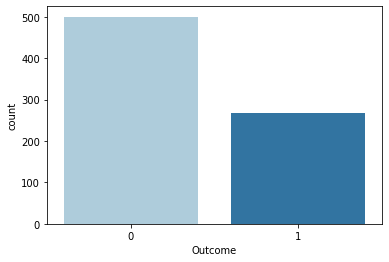

In [7]:
sns.countplot(x = 'Outcome', data = df, palette = 'Paired')

[Text(0.5, 0, 'Number of Previous Pregnancies')]

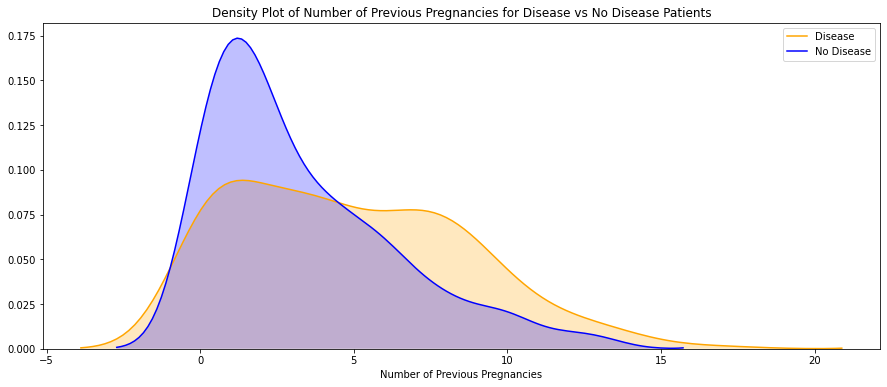

In [8]:
plt.figure(figsize = (15,6))

aa = sns.kdeplot(df['Pregnancies'][df['Outcome'] == 1], color = 'orange', shade = True)
sns.kdeplot (df['Pregnancies'][df['Outcome'] == 0], color = 'blue', shade = True)

plt.legend (['Disease', 'No Disease'])
plt.title('Density Plot of Number of Previous Pregnancies for Disease vs No Disease Patients')
aa.set(xlabel = 'Number of Previous Pregnancies')

[Text(0.5, 0, 'Fasting Glucose Level')]

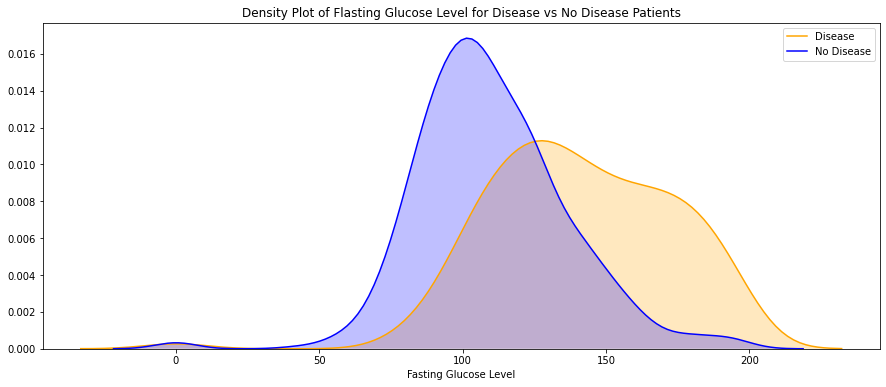

In [9]:
plt.figure(figsize = (15,6))

aa = sns.kdeplot(df['Glucose'][df['Outcome'] == 1], color = 'orange', shade = True)
sns.kdeplot (df['Glucose'][df['Outcome'] == 0], color = 'blue', shade = True)

plt.legend (['Disease', 'No Disease'])
plt.title('Density Plot of Flasting Glucose Level for Disease vs No Disease Patients')
aa.set(xlabel = 'Fasting Glucose Level')

[Text(0.5, 0, 'Fasting Insulin Level')]

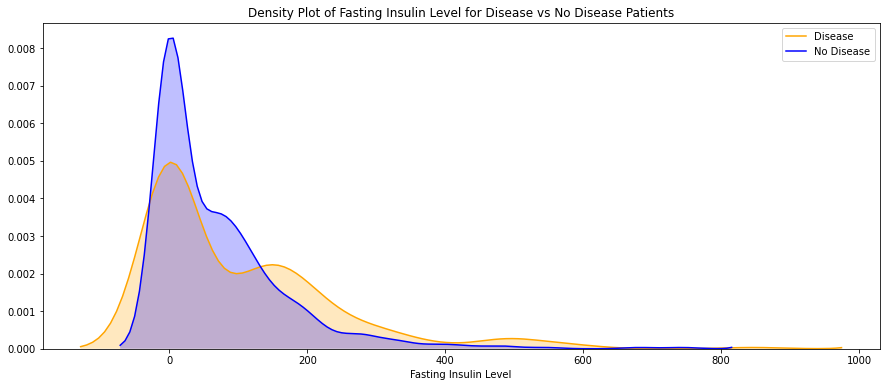

In [10]:
plt.figure(figsize = (15,6))

aa = sns.kdeplot(df['Insulin'][df['Outcome'] == 1], color = 'orange', shade = True)
sns.kdeplot (df['Insulin'][df['Outcome'] == 0], color = 'blue', shade = True)

plt.legend (['Disease', 'No Disease'])
plt.title('Density Plot of Fasting Insulin Level for Disease vs No Disease Patients')
aa.set(xlabel = 'Fasting Insulin Level')

[Text(0.5, 0, 'BMI')]

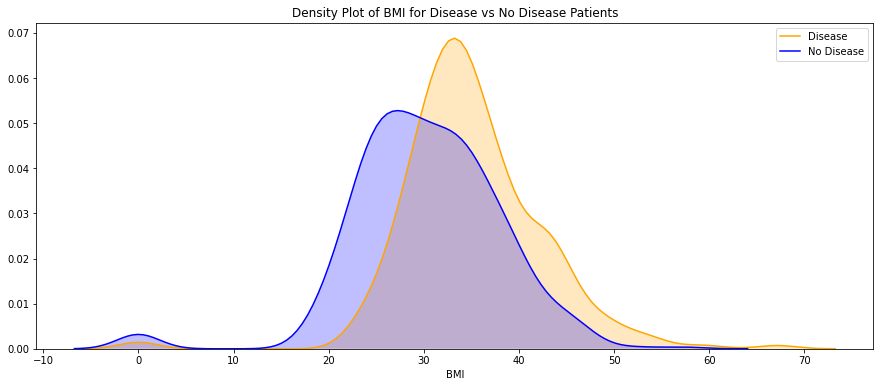

In [11]:
plt.figure(figsize = (15,6))

aa = sns.kdeplot(df['BMI'][df['Outcome'] == 1], color = 'orange', shade = True)
sns.kdeplot (df['BMI'][df['Outcome'] == 0], color = 'blue', shade = True)

plt.legend (['Disease', 'No Disease'])
plt.title('Density Plot of BMI for Disease vs No Disease Patients')
aa.set(xlabel = 'BMI')

[Text(0.5, 0, 'DiabetesPedigreeFunction')]

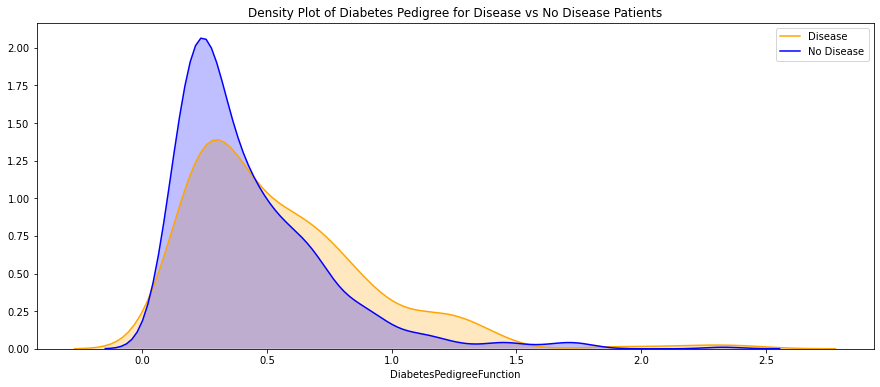

In [12]:
plt.figure(figsize = (15,6))

aa = sns.kdeplot(df['DiabetesPedigreeFunction'][df['Outcome'] == 1], color = 'orange', shade = True)
sns.kdeplot (df['DiabetesPedigreeFunction'][df['Outcome'] == 0], color = 'blue', shade = True)

plt.legend (['Disease', 'No Disease'])
plt.title('Density Plot of Diabetes Pedigree for Disease vs No Disease Patients')
aa.set(xlabel = 'DiabetesPedigreeFunction')

[Text(0.5, 0, 'Age')]

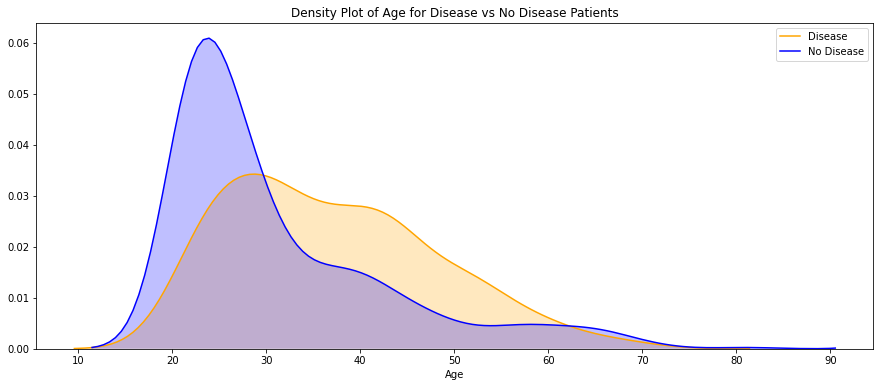

In [13]:
plt.figure(figsize = (15,6))

aa = sns.kdeplot(df['Age'][df['Outcome'] == 1], color = 'orange', shade = True)
sns.kdeplot (df['Age'][df['Outcome'] == 0], color = 'blue', shade = True)

plt.legend (['Disease', 'No Disease'])
plt.title('Density Plot of Age for Disease vs No Disease Patients')
aa.set(xlabel = 'Age')

***************************************
#### Step 4-A: Prepare for Logistic Regression -- Statsmodels  
***************************************

In [23]:
# Import statsmodels library

import statsmodels.api as sm

# seperate data into X and y

y = df['Outcome']

X = df.drop(['Outcome'], axis=1)

# the logistic regression function in statsmodels will not automatically include
# an intercept/constant -- we can add one manually

X['intercept'] = 1

In [25]:
# Create a Logistic Regression model

model = sm.Logit(y,X).fit()

# Print the summary of the regression output 

model.summary()

Optimization terminated successfully.
         Current function value: 0.475344
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            6
Date:                Wed, 18 Nov 2020   Pseudo R-squ.:                  0.2651
Time:                        15:52:22   Log-Likelihood:                -365.06
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.724e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1177      0.032      3.705      0.000       0.055       0.180
Glucose                      0.0347      0.004      9.540      0.000       0.028       0.042
Insulin                     -0.0012      0.001     -1.545      0.122      -0.003       0.000
BMI                          0.0822      0.014      5.871      0.000       0.055       0.110
DiabetesPedigreeFunction     0.9467      0.295      3.204      0.001       0.368       1.526
Age                          0.0108      0.009      1.178      0.239      -0.007       0.029
intercept                   -8.8442      0.704    -12.557      0.000     -10.225      -7.464
============================================================================================
"""

#### Calculating Odds Ratios and Percent Change in Odds

In [26]:
# print only the coefficients 
model.params

Pregnancies                 0.117669
Glucose                     0.034670
Insulin                    -0.001248
BMI                         0.082235
DiabetesPedigreeFunction    0.946713
Age                         0.010758
intercept                  -8.844177
dtype: float64

In [27]:
# calculate the Odds Ratio of the coefficients 
odds_ratio = np.exp(model.params)

print(odds_ratio)

Pregnancies                 1.124871
Glucose                     1.035278
Insulin                     0.998753
BMI                         1.085711
DiabetesPedigreeFunction    2.577224
Age                         1.010816
intercept                   0.000144
dtype: float64


In [28]:
print("With each additional pregnancy, the odds of developing diabetes increases by", odds_ratio[0])
print("With each one-unit increase in fasting glucose level, the odds of developing diabetes increases by", odds_ratio[1])
print("With each one-unit increase in insulin level, the odds of developing diabetes decrease by", odds_ratio[2])
print("With each one-unit increase in BMI, the odds of developing diabetes increases by", odds_ratio[3])
print("With each one-unit increase in Diabetes Pedigree Score, the odds of developing diabetes increases by", odds_ratio[4])
print("For every one year increase in age, the odds of developing diabetes increases by", odds_ratio[5])

With each additional pregnancy, the odds of developing diabetes increases by 1.1248712316367113
With each one-unit increase in fasting glucose level, the odds of developing diabetes increases by 1.0352779207171117
With each one-unit increase in insulin level, the odds of developing diabetes decrease by 0.9987531280306623
With each one-unit increase in BMI, the odds of developing diabetes increases by 1.0857108494398109
With each one-unit increase in Diabetes Pedigree Score, the odds of developing diabetes increases by 2.5772237577994748
For every one year increase in age, the odds of developing diabetes increases by 1.0108160357459597


In [29]:
# calculate the Percent Change based on the Odds
pct_change = (odds_ratio - 1)*100

print(pct_change)

Pregnancies                  12.487123
Glucose                       3.527792
Insulin                      -0.124687
BMI                           8.571085
DiabetesPedigreeFunction    157.722376
Age                           1.081604
intercept                   -99.985578
dtype: float64


In [30]:
print("With each additional pregnancy, the odds of developing diabetes increases by %", pct_change[0])
print("With each one-unit increase in fasting glucose level, the odds of developing diabetes increases by %", pct_change[1])
print("With each one-unit increase in insulin level, the odds of developing diabetes decrease by %", pct_change[2])
print("With each one-unit increase in BMI, the odds of developing diabetes increases by %", pct_change[3])
print("With each one-unit increase in Diabetes Pedigree Score, the odds of developing diabetes increases by %", pct_change[4])
print("For every one year increase in age, the odds of developing diabetes increases by %", pct_change[5])

With each additional pregnancy, the odds of developing diabetes increases by % 12.487123163671132
With each one-unit increase in fasting glucose level, the odds of developing diabetes increases by % 3.5277920717111666
With each one-unit increase in insulin level, the odds of developing diabetes decrease by % -0.1246871969337704
With each one-unit increase in BMI, the odds of developing diabetes increases by % 8.571084943981088
With each one-unit increase in Diabetes Pedigree Score, the odds of developing diabetes increases by % 157.72237577994747
For every one year increase in age, the odds of developing diabetes increases by % 1.0816035745959685


***************************************
#### Step 4-B: Prepare for Logistic Regression -- sklearn  
***************************************

In [31]:
# Logistic Regression function
from sklearn.linear_model import LogisticRegression

# Function to split dataset
from sklearn.model_selection import train_test_split

# Evaluating Logistic Regression Model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assign the Logistic Regression function to a variable name

log = LogisticRegression()

In [32]:
# If you are creating a Statsmodels model prior to an sklearn model, you must RE-DEFINE the X and y varibles

# seperate data into X and y

y = df['Outcome']

X = df.drop(['Outcome'], axis=1)

***************************************
#### Step 5: Splitting data, Training and Testing your Model 
***************************************

In [33]:
# Split data into the training and testing data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 6)
(537,)
(231, 6)
(231,)


***************************************
#### Training your Model & Testing your Model
***************************************

In [34]:
# fit training data to logistic regression function

log.fit(X_train, y_train)

C:\Users\MR_SA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# test how well your model can predict outcomes given x-values
y_predict = log.predict(X_test)

# let's see what predictions are being made and how they compare to the actual values
predictions = pd.DataFrame(list(zip(y_test, y_predict)), columns = ["actual", "prediction"])
predictions.head()

,actual,prediction
0,0,0
1,0,1
2,0,0
3,1,0
4,0,0


***************************************
#### Step 6: Evaluating Model Performance 
***************************************
<b><i>Confusion Matrix</i></b>

The confusion matrix shows the number of correct classifications along with misclassifications when a model makes predictions for each class. The diagnoal elements are correct classifications while the off-diagonal elements are misclassifications. There are four possible outcome classes:

1. True positive(TP)— actual = 1, predicted = 1
2. False positive(FP)— actual = 0, predicted = 1
3. False negative(FN)— actual = 1, predicted = 0
4. True negative(TN)— actual = 0, predicted = 0

Breakdown of confusion matrix: https://scaryscientist.blogspot.com/2016/03/confusion-matrix.html?view=classic
***************************************
Using the values in the confusion matrix, you can calculate the follow metrics:

* <b><i>Accuracy</i></b>

The fraction of predictions that our model got right (i.e. an accuracy rate of 79.1 means our model correctly predicts the outcome 79% of the time). You can calculate accuracy using the following fomula:

Accuracy = (TP+TN)/(TP+FP+TN+FN)

* <b><i>Precision</i></b>

The ratio of true positives (TP) to total predicted positives (TP + FP). Precision score tells how many TP's our model predicted out of total predicted positives (i.e. a precision rate of 82.3 means when our model predicts a patient has diabetes, it is correct 82% of the time).

* <b><i>Recall/Sensitivity</i></b>

The ratio of true positives (TP) to total actual positives (TP + FN). Recall score calculates TP's from total actual positives (i.e. a recall rate of 71.6 means our model correctly identifies 72% of patients with diabetes; you can also say - our model predicts 72% of diabetic patients as diabetic). 

* <b><i>F1 Score</i></b>

When determining how your model performs, you want to consider both the precision and recall. The F1 score is the balanced harmonic mean of recall and precision, giving both metrics equal weight. The higher the F1 score is, the better. 
***************************************
<b><i>Classification Report</i></b>

In addition to the confusion matrix, you can print a classification report which will calculate the precision, recall, and F1 score for both outcome classes. 

In [36]:
# Confusion matrix shows which values our model predicted correctly vs incorrectly

cm = pd.DataFrame(confusion_matrix(y_test, y_predict),columns=['Predicted No Disease', 'Predicted Disease'],index=['True No Disease', 'True Disease'])

cm

,Predicted No Disease,Predicted Disease
True No Disease,137,23
True Disease,34,37


#### Confusion Matrix Table interpretation 
***************************************

* True positive (TP) — 37
* False positive (FP) — 23
* False negative (FN) — 34
* True negative (TN) — 137

In [37]:
# Calculate Model Accuracy
# Accuracy = (TP + TN)/(TP + FP + TN + FN)

Accuracy = (37 + 137) / (37 + 23 + 34 + 137)
print(Accuracy*100)

75.32467532467533


In [38]:
# print the classification report to see how our model did across both outcome classes

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       160
           1       0.62      0.52      0.56        71

    accuracy                           0.75       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.74      0.75      0.75       231



#### Classification Table interpretation 
***************************************

<b>Precision</b>
* 80% for predicting non-diabetic patients; when our model predicts that a patient does not have diabetes - it is correct 80% of the time. 
* 62% for predicting diabetic patients; when our model predicts that a patient does have diabetes - it is correct 62% of the time. 

<b>Recall</b>
* 86% for predicting non-diabetic patients; our model correctly identifies 86% of patients without diabetes.
* 52% for predicting diabetic patients; our model correctly identifies 52% of patients with diabetes. 

<b>F1 Score</b>
* The F1 score is much higher when predicting non-diabetic outcomes. Model is better at predicting those without diabetes.  